In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from load_data import load_data
from annual_collision_count import annual_collision_count
from avg_monthly_collisions import avg_monthly_collisions


Load dataset into dataframe

In [2]:
df = load_data()

Select airports with the most collisions. Needed for future analysis.

In [3]:
# select top 30 airports by collisions
arpts = df['AIRPORT'].value_counts().head(30).index.to_list()

# Distribution of collisions by time of day and sky conditions

Get labels and collision counts for time of day and sky conditions

In [4]:
time_collision_counts = df['TIME_OF_DAY'].value_counts()
sky_collision_counts = df['SKY'].value_counts()

time_index = time_collision_counts.index.to_list()
time_values = time_collision_counts.values.tolist()
sky_index = sky_collision_counts.index.to_list()
sky_values = sky_collision_counts.values.tolist()

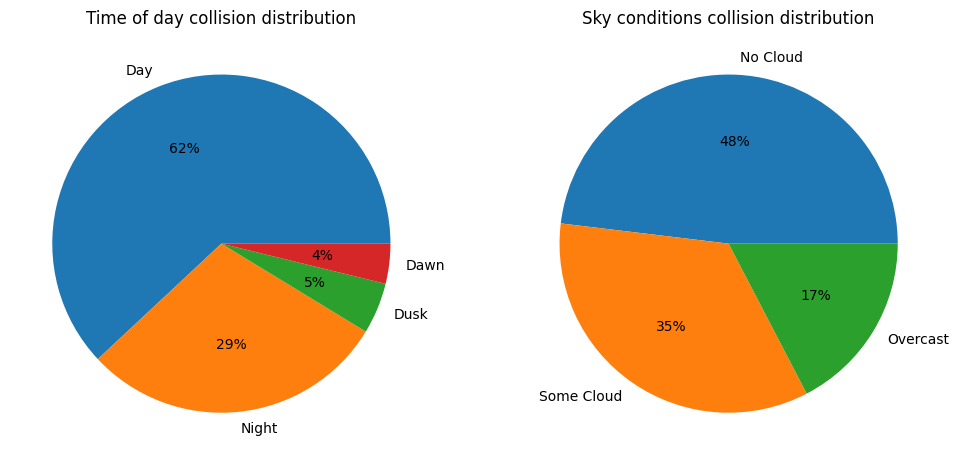

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(12,8))
axes[0].pie(time_values, labels=time_index, autopct='%.0f%%')
axes[0].set_title('Time of day collision distribution')
axes[1].pie(sky_values, labels=sky_index, autopct='%.0f%%')
axes[1].set_title('Sky conditions collision distribution')

plt.show()

# Distribution of collisons by flight phase

Get phase value counts data

In [6]:
phase_count = df['PHASE_OF_FLIGHT'].value_counts()
phase_index = phase_count.index.to_list()
phase_values = phase_count.values.tolist()

Combine small categories into a single category

In [7]:
# get sum of small values
other = sum(phase_values[4:])
# remove small values and indexes from list
del phase_values[4:], phase_index[4:]
# add combined category back to lists
phase_values.append(other)
phase_index.append('Other')

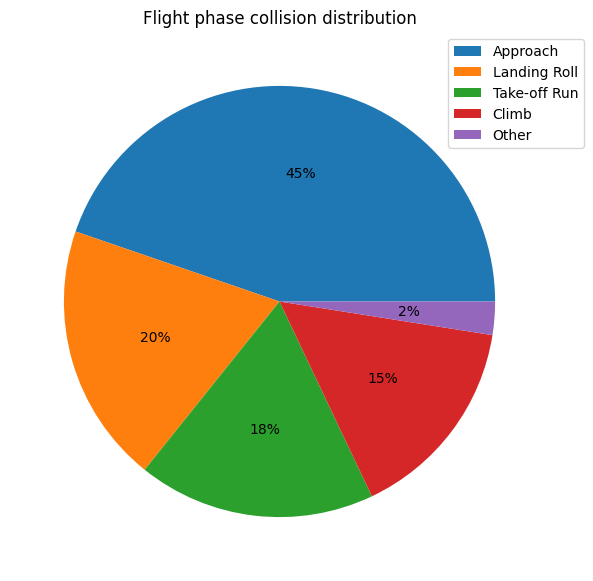

In [18]:
plt.figure(figsize=(12,7))
plt.pie(phase_values, autopct='%.0f%%')
plt.legend(phase_index, bbox_to_anchor=(.8,1))
plt.title('Flight phase collision distribution')
plt.show()

# Annual collisions

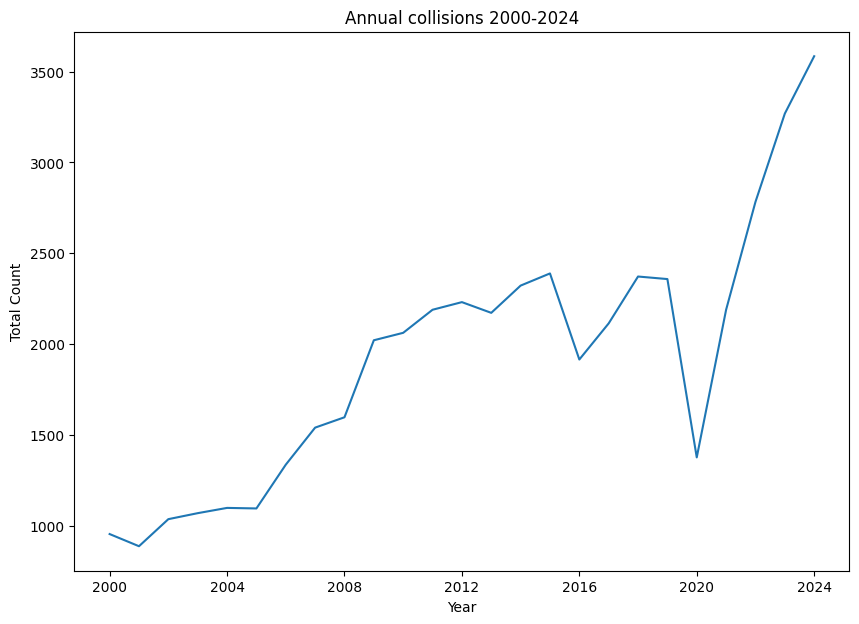

In [9]:
# dataframe for annual collisions
all_collisions = annual_collision_count(df, arpts, 2000)

plt.figure(figsize=(10,7))
sns.lineplot(x='Year', y='Total Count', data=all_collisions)
plt.xticks(list(range(2000,2025,4)))
plt.title('Annual collisions 2000-2024')
plt.show()

# Annual collisions by time of day & sky condition

Load time of day data

In [10]:
# filter dataframes
day = df[df['TIME_OF_DAY'] == 'Day']
night = df[df['TIME_OF_DAY'] == 'Night']

day_data = annual_collision_count(day, arpts, 2000)
night_data = annual_collision_count(night, arpts, 2000)

Load sky conditions data

In [11]:
# filter dataframes
no_cloud = df[df['SKY'] == 'No Cloud']
some_cloud = df[df['SKY'] == 'Some Cloud']
overcast = df[df['SKY'] == 'Overcast']

no_cloud_data = annual_collision_count(no_cloud, arpts, 2000)
some_cloud_data = annual_collision_count(some_cloud, arpts, 2000)
overcast_data = annual_collision_count(overcast, arpts, 2000)

Plot data

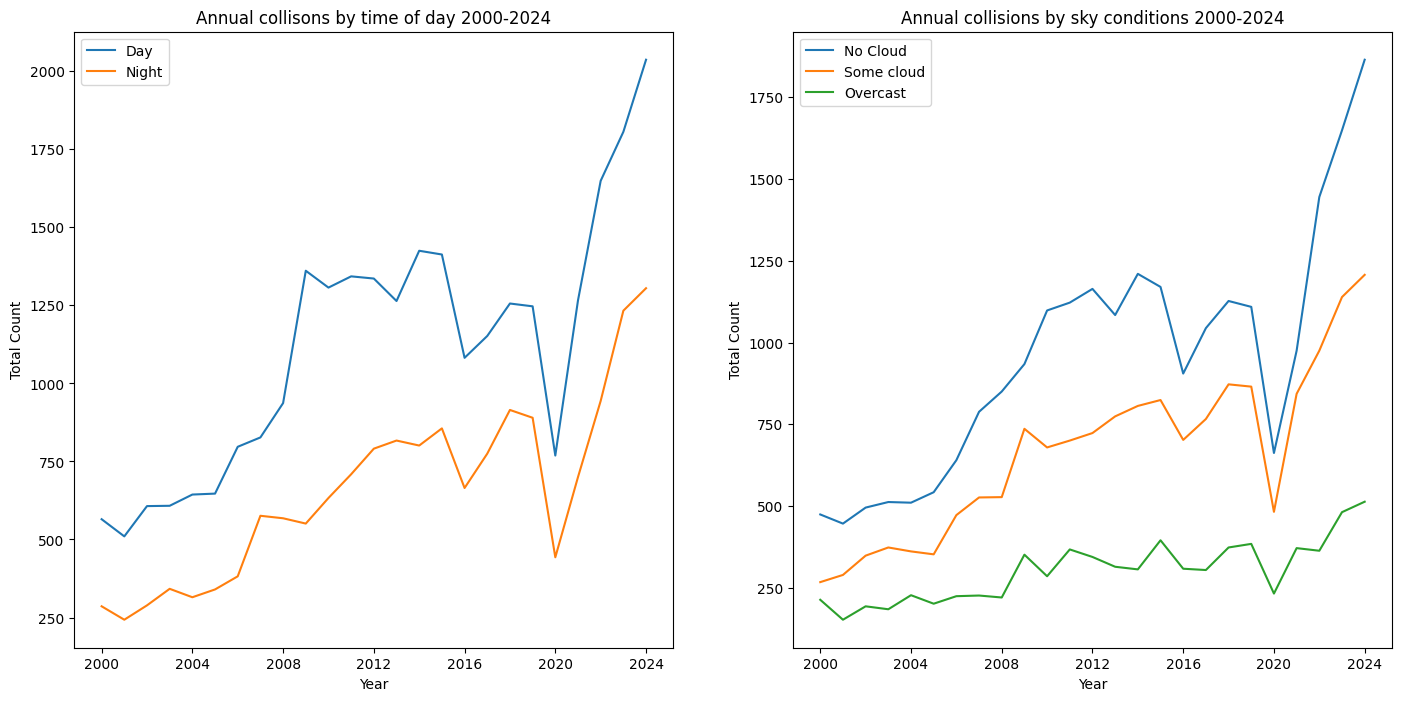

In [12]:
fig, axes = plt.subplots(ncols=2, figsize=(17,8))

# time of day plots
sns.lineplot(x='Year', y='Total Count', label='Day',
             data=day_data, ax=axes[0])
sns.lineplot(x='Year', y='Total Count', label='Night',
             data=night_data, ax=axes[0])

# sky conditions plots
sns.lineplot(x='Year', y='Total Count', label='No Cloud',
             data=no_cloud_data, ax=axes[1])
sns.lineplot(x='Year', y='Total Count', label='Some cloud',
             data=some_cloud_data, ax=axes[1])
sns.lineplot(x='Year', y='Total Count', label='Overcast',
             data=overcast_data, ax=axes[1])

# x axis formatting
axes[0].set_xticks(list(range(2000,2025,4)))
axes[1].set_xticks(list(range(2000,2025,4)))
axes[0].set_title('Annual collisons by time of day 2000-2024')
axes[1].set_title('Annual collisions by sky conditions 2000-2024')

plt.show()

# Average monthly collisions

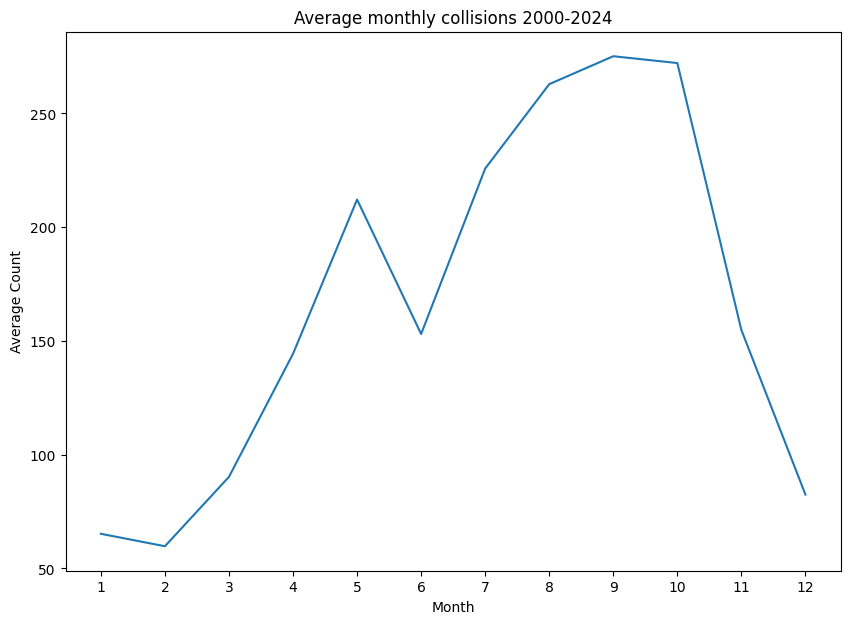

In [13]:
# dataframe for avg monthly collisions
top_arpt_data = avg_monthly_collisions(df, arpts, 2000)

plt.figure(figsize=(10,7))
sns.lineplot(x='Month', y='Average Count', data=top_arpt_data)
plt.xticks(list(range(1,13)))
plt.title("Average monthly collisions 2000-2024")
plt.show()

# Annual collisions of known vs unknown species

Select top species

In [14]:
top_species = df['SPECIES'].value_counts().head(10)
print(top_species)

SPECIES
Unknown bird - small     37314
Unknown bird - medium    15794
Unknown bird              9025
Gulls                     5677
Barn swallow              4554
Mourning dove             4529
European starling         3195
Unknown bird - large      2715
Sparrows                  2664
Killdeer                  2613
Name: count, dtype: int64


Select top 3 known/unknown species

In [15]:
unk_species = top_species[:3].index.to_list()
known_species = top_species[3:6].index.to_list()

Get collision counts for each

In [16]:
unk_species_df = df[df['SPECIES'].isin(unk_species)]
unk_species_data = annual_collision_count(unk_species_df, arpts, 2000)

known_species_df = df[~df['SPECIES'].isin(known_species)]
known_species_data = annual_collision_count(known_species_df, arpts, 2000)

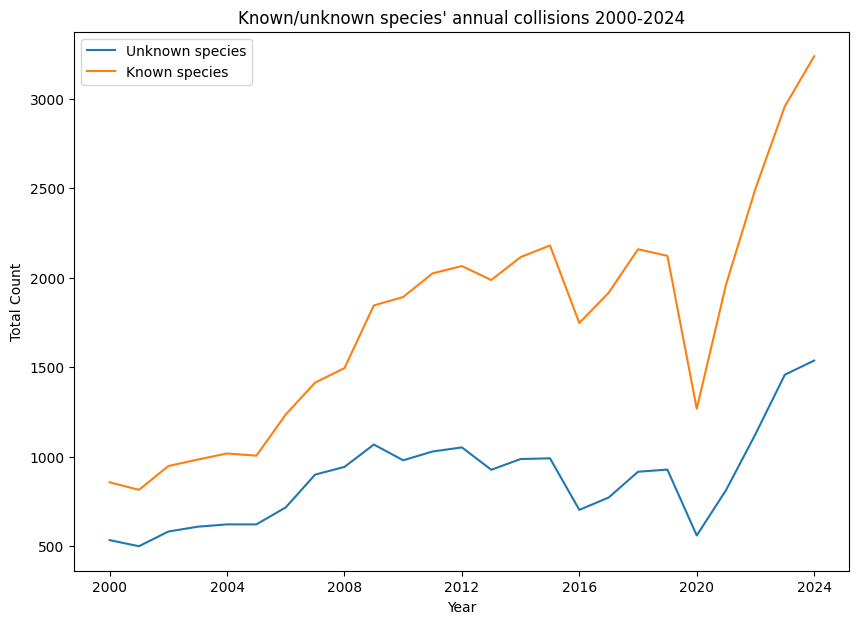

In [17]:
plt.figure(figsize=(10,7))
sns.lineplot(x='Year', y='Total Count', label='Unknown species',
             data=unk_species_data)
sns.lineplot(x='Year', y='Total Count', label='Known species',
             data=known_species_data)
plt.title("Known/unknown species' annual collisions 2000-2024")
plt.xticks(list(range(2000,2025,4)))
plt.show()

# Conclusion
Airplane wildlife collisions are increasing. Most occur during the day and under cloudless skies, while significantly less occur at night and during overcast skies. Daytime and cloudless collisions have also increased more than collisions under other conditions. 
<br>
<br>
Nighttime collisions may be less common because of fewer active flights and reduced wildlife activity. Overcast collisions may be less common simply because airports with the most collisions typically have clear skies, but more data is necessary to support this claim. 
<br>
<br>
Nearly half of all collisions occur when aircraft are approaching airports. Collisions are also common on the runway and during the climb. The least collisions occur while away from airports. This is likely because wildlife stays at lower altitudes and near airports which provide habitat.
<br>
<br>
The most collisions occur during August, September, and October. This may be due to fall migration and busier airports during vacationing months.
<br>
<br>
Collisions of unknown species have remained stable, while known species have increased significantly. This may be due to improved methods of identification.